In [ ]:
install.packages('RCurl')
install.packages('gsheet')
install.packages('sqldf')
install.packages('gsubfn')
install.packages('Epi')
install.packages('pROC')
install.packages('ROCR')
library(gsheet)
library(RCurl)
library(sqldf)
library(gsubfn)
library(tcltk)
library(pROC)
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppArmadillo’, ‘cmprsk’, ‘etm’, ‘plyr’, ‘numDeriv’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘caTools’, ‘gplots’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loadin

In [ ]:
data = read.csv(text = gsheet2text('https://docs.google.com/spreadsheets/d/1ba1IYjX79EEmgBmsEzZgNs6Joe4v-SECWZUhbfhewhc/edit?usp=sharing', format ='csv'))

No encoding supplied: defaulting to UTF-8.



In [ ]:
data = sqldf("select id, d, min(t), fpsa, tpsa, age from 'data'\n group by id")
data$age_group <- cut(data$age, breaks = c(45,55,65,75), labels = c("(45,55]","(55,65]","(65,75]"))
colnames(data)[2] = "outcome"
head(data)

,id,outcome,min(t),fpsa,tpsa,age,age_group
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,1,-4.482,3.525,14.82,67.581,"(65,75]"
2,2,1,-4.498,1.104,5.54,70.166,"(65,75]"
3,3,0,-3.381,0.226,0.94,55.028,"(55,65]"
4,4,1,-4.619,0.583,9.30,57.424,"(55,65]"
5,5,0,-4.005,0.377,1.71,62.732,"(55,65]"
6,6,1,-0.337,0.150,0.58,58.360,"(55,65]"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



List of 15
 $ percent           : logi FALSE
 $ sensitivities     : num [1:120] 1 1 1 0.986 0.986 ...
 $ specificities     : num [1:120] 0 0.0286 0.0429 0.0429 0.0571 ...
 $ thresholds        : num [1:120] -Inf 0.3 0.385 0.445 0.455 ...
 $ direction         : chr "<"
 $ cases             : num [1:71] 14.82 5.54 9.3 0.58 13.61 ...
 $ controls          : num [1:70] 0.94 1.71 0.96 0.27 1.04 1.93 1.5 0.92 4.47 0.45 ...
 $ fun.sesp          :function (thresholds, controls, cases, direction)  
 $ auc               : 'auc' num 0.849
  ..- attr(*, "partial.auc")= logi FALSE
  ..- attr(*, "percent")= logi FALSE
  ..- attr(*, "roc")=List of 15
  .. ..$ percent           : logi FALSE
  .. ..$ sensitivities     : num [1:120] 1 1 1 0.986 0.986 ...
  .. ..$ specificities     : num [1:120] 0 0.0286 0.0429 0.0429 0.0571 ...
  .. ..$ thresholds        : num [1:120] -Inf 0.3 0.385 0.445 0.455 ...
  .. ..$ direction         : chr "<"
  .. ..$ cases             : num [1:71] 14.82 5.54 9.3 0.58 13.61 ...
 

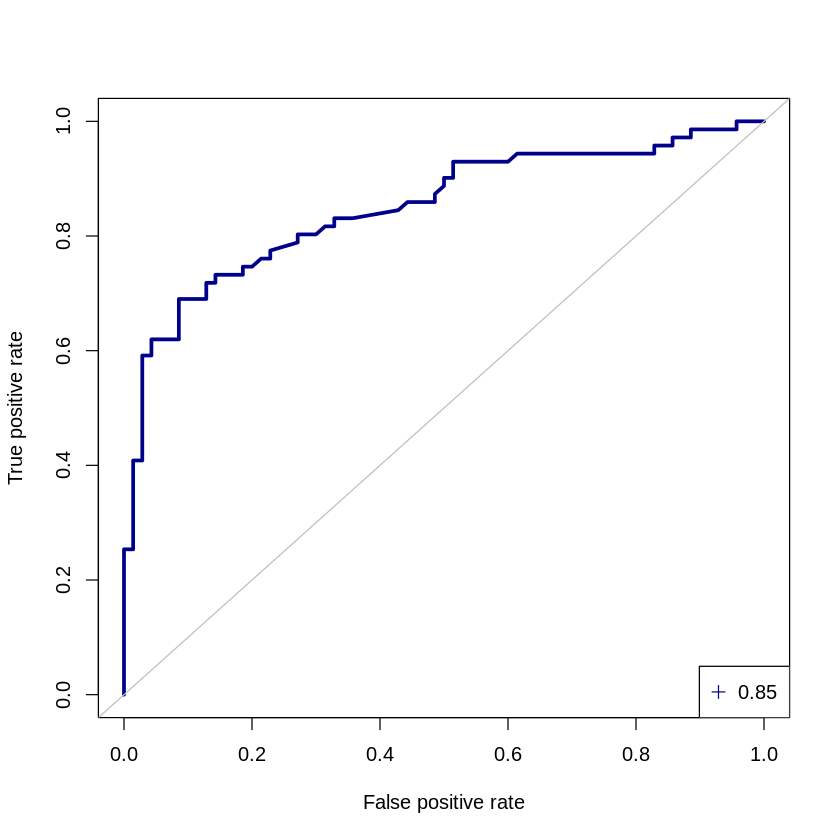

In [ ]:
rock = pROC::roc(data$outcome, data$tpsa)
str(rock)
pred <- prediction(data$tpsa, data$outcome)
perf <- performance(pred, "tpr", "fpr")
# performance metrics TPR: True Positive Ratio FPR: False Positive Ratio
plot(perf, col = "blue4", lwd=3)
abline(0, 1, col = "grey")
auc <- performance(pred, "auc")
legend("bottomright", paste(round(as.numeric(auc@y.values), digits = 2)), col = c("blue4"), pch = c(3))

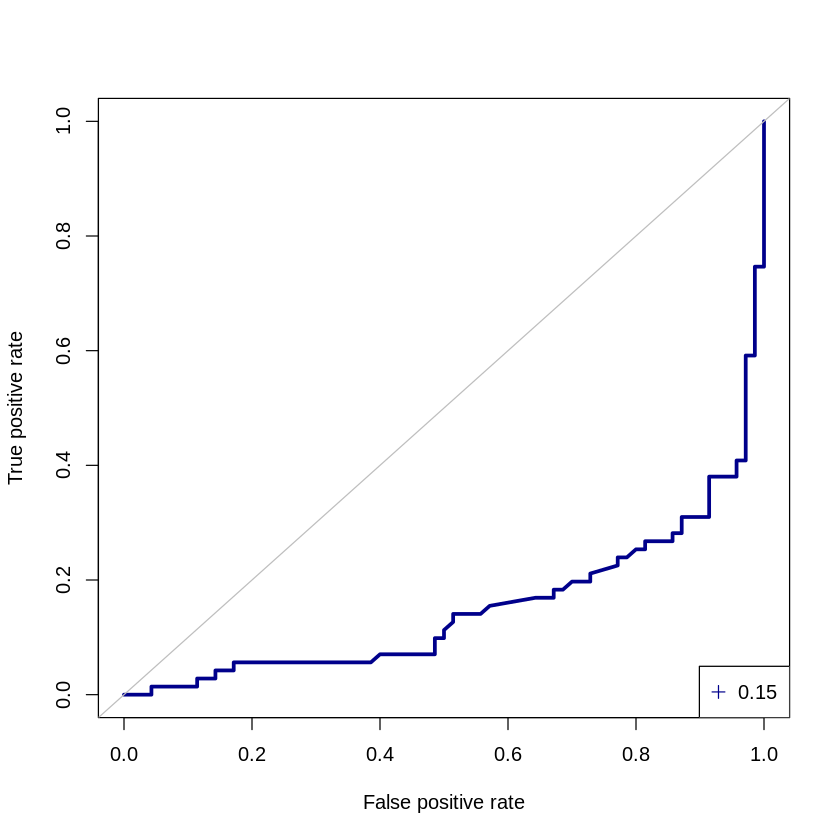

In [ ]:
pred <- prediction(1/data$tpsa, data$outcome)
perf <- performance(pred, "tpr", "fpr")
plot(perf, col = "blue4", lwd=3)
abline(0, 1, col = "grey")
auc <- performance(pred, "auc")
legend("bottomright", paste(round(as.numeric(auc@y.values), digits = 2)), col = c("blue4"), pch = c(3))

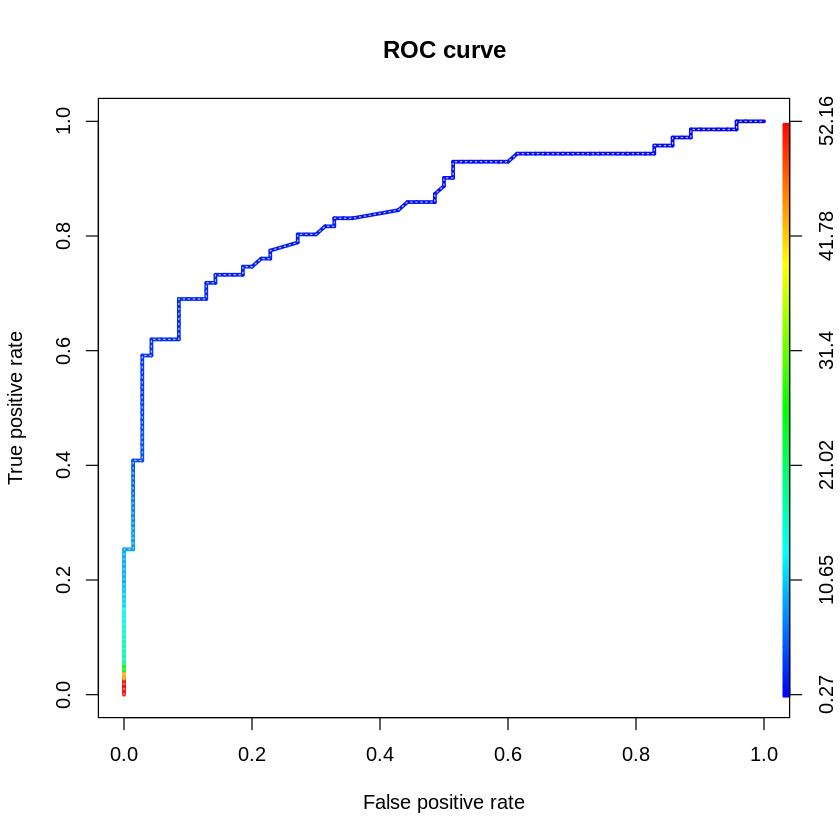

In [ ]:
pr <- prediction(data$tpsa, data$outcome)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")

prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf, main= 'ROC curve',
     colorize=TRUE,
     lwd= 3)
plot(prf,
     lty=3,
     col="grey78",
     add=TRUE)

Loading required package: Epi

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


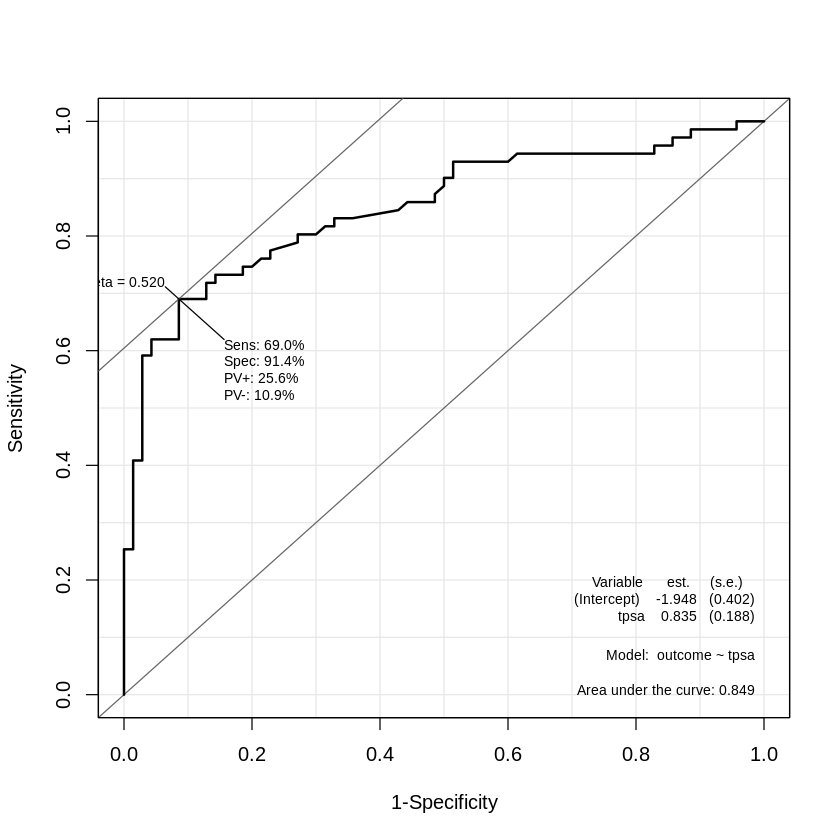

In [ ]:
require('Epi')
ROC(form = outcome ~ tpsa, data=data, plot = "ROC", MX = T)

In [ ]:
summary(glm(as.factor(outcome) ~ tpsa, data = data, family = "binomial"))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = as.factor(outcome) ~ tpsa, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2278  -0.7869   0.0000   0.8445   1.8805  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.9483     0.4017  -4.851 1.23e-06 ***
tpsa          0.8346     0.1883   4.433 9.31e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 195.46  on 140  degrees of freedom
Residual deviance: 134.67  on 139  degrees of freedom
AIC: 138.67

Number of Fisher Scoring iterations: 7
